In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

https://drive.google.com/file/d/1sRRpG1LkEJJpTmNiCHmcL12LR5xnLg69/view?usp=sharing  
1. 링크로 들어가서 데이터 다운로드
2. 코랩 왼쪽 바에 파일 폴더 선택
3. sample data 폴더 우클릭 -> 업로드 선택
4. 다운로드 받은 데이터 업로드

## 쇼핑몰 고객 분석 데이터셋


**Data Set Characteristics:**  

    :Number of Instances: 200

    :Number of Attributes: 5

    :Attribute Information (in order):
        - Custormer ID
        - Gender
        - Age    
        - Annual Income
        - Spending Score(1-100)

    :Missing Attribute Values: None

In [3]:
dataframe = pd.read_csv('sample_data/Mall_Customers.csv')

In [ ]:
dataframe.head(3)

## K-means clustering

In [15]:
# Annual Income, Spending Score 컬럼만 사용
X_data = dataframe[['Annual Income (k$)', 'Spending Score (1-100)']]

In [16]:
from sklearn.cluster import KMeans

k = 3

model = KMeans(n_clusters = k, random_state = 10)
model.fit(X_data)

df1 = dataframe.copy()

In [17]:
df1['cluster'] = model.fit_predict(X_data)

In [ ]:
# 시각화
import matplotlib.pyplot as plt

for i in range(k) :
  plt.scatter(df1.loc[df1['cluster'] == i, 'Annual Income (k$)'],
              df1.loc[df1['cluster'] == i, 'Spending Score (1-100)'],
              label = 'cluster'+str(i))
plt.legend()
plt.title(f'K = {str(k)} results')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### K 갯수를 바꾸고 학습 진행

In [24]:
distortions = []

for i in range(1, 11) :
  km = KMeans(n_clusters=i,
              random_state=10)
  km.fit(X_data)
  distortions.append(km.inertia_)

In [ ]:
import matplotlib.pyplot as plt

# 5가 elbow point처럼 보임
plt.plot(range(1,11), distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [29]:
from sklearn.cluster import KMeans


k = 5

model = KMeans(n_clusters = k, random_state = 10)
model.fit(X_data)

df2 = dataframe.copy()

In [ ]:
df2['cluster'] = model.fit_predict(X_data)

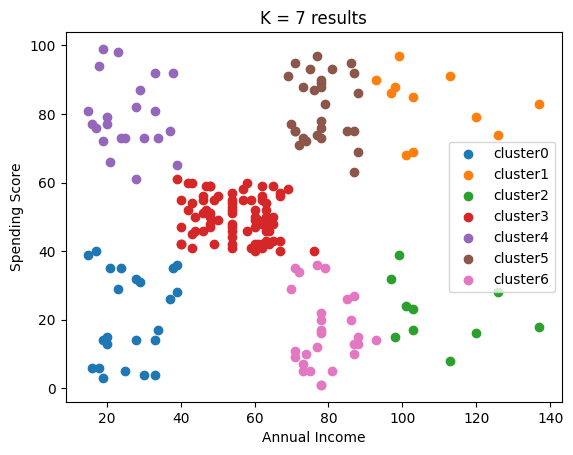

In [28]:
# 시각화
import matplotlib.pyplot as plt

for i in range(k) :
  plt.scatter(df2.loc[df2['cluster'] == i, 'Annual Income (k$)'],
              df2.loc[df2['cluster'] == i, 'Spending Score (1-100)'],
              label = 'cluster'+str(i))
plt.legend()
plt.title(f'K = {str(k)} results')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## 실습문제

In [ ]:
# Age, Spending Score 컬럼만 사용하여 K-means Clustering 진행
# 1. elbow point 값을 구하기 (시각화 포함)
# 2. elbow point 값을 K로하여 K-mean Clustering 진행
# 3. K-means clustering 시각화

X_data = dataframe[['Age', 'Spending Score (1-100)']]
